TASK-1: Train Word2Vec on a small text corpus

In [2]:
!pip install gensim

In [12]:
import gensim
import pandas as pd

In [13]:
text = "IIT Bombay is one of the top engineering institutes in India and is located in Powai Mumbai. Students at IIT Bombay study computer science electrical engineering mechanical engineering and civil engineering. The campus of IIT Bombay is surrounded by Sanjay Gandhi National Park and has a large lake and green spaces. Many students at IIT Bombay participate in research internships startups and technical competitions."

In [14]:
review_text = gensim.utils.simple_preprocess(text)
review_text

['iit',
 'bombay',
 'is',
 'one',
 'of',
 'the',
 'top',
 'engineering',
 'institutes',
 'in',
 'india',
 'and',
 'is',
 'located',
 'in',
 'powai',
 'mumbai',
 'students',
 'at',
 'iit',
 'bombay',
 'study',
 'computer',
 'science',
 'electrical',
 'engineering',
 'mechanical',
 'engineering',
 'and',
 'civil',
 'engineering',
 'the',
 'campus',
 'of',
 'iit',
 'bombay',
 'is',
 'surrounded',
 'by',
 'sanjay',
 'gandhi',
 'national',
 'park',
 'and',
 'has',
 'large',
 'lake',
 'and',
 'green',
 'spaces',
 'many',
 'students',
 'at',
 'iit',
 'bombay',
 'participate',
 'in',
 'research',
 'internships',
 'startups',
 'and',
 'technical',
 'competitions']

In [15]:
model_w2v = gensim.models.Word2Vec(vector_size=100, window=10, min_count=2, workers=4)

In [16]:
model_w2v.build_vocab([review_text], progress_per=1000)

In [17]:
model_w2v.epochs

5

In [18]:
model_w2v.train([review_text], total_examples=model_w2v.corpus_count, epochs=model_w2v.epochs)

(12, 315)

In [20]:
model_w2v.wv.most_similar("iit")

[('is', 0.13160236179828644),
 ('the', 0.07498352229595184),
 ('engineering', 0.06828339397907257),
 ('at', 0.04156782105565071),
 ('bombay', -0.013116978108882904),
 ('students', -0.013517100363969803),
 ('in', -0.04442768916487694),
 ('and', -0.11167559027671814),
 ('of', -0.16936103999614716)]

TASK-2: Build an LSTM sentiment classifier

In [28]:
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

df = pd.read_csv(path+"/IMDB Dataset.csv")
df.head()


/home/prabanjan/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

2026-01-07 01:18:04.687294: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-07 01:18:05.195147: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-07 01:18:06.444792: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [24]:
df["label"] = df["sentiment"].map({"positive": 1,"negative": 0})

X_train, X_test, y_train, y_test = train_test_split(df.review,df.label,test_size=0.2,random_state=1,stratify=df.label)

In [25]:
vocab_size = 10000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

In [26]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(128),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

/home/prabanjan/venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2026-01-07 01:18:46.039383: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [27]:
model.fit(
    X_train_pad,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 166ms/step - accuracy: 0.5562 - loss: 0.6901 - val_accuracy: 0.6214 - val_loss: 0.6573
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.7036 - loss: 0.5680 - val_accuracy: 0.8577 - val_loss: 0.4001
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 168ms/step - accuracy: 0.8844 - loss: 0.3065 - val_accuracy: 0.8830 - val_loss: 0.2831
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 166ms/step - accuracy: 0.9207 - loss: 0.2206 - val_accuracy: 0.8860 - val_loss: 0.2824
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 87s 175ms/step - accuracy: 0.9427 - loss: 0.1725 - val_accuracy: 0.8869 - val_loss: 0.2937


In [27]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_pad)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5000
           1       0.87      0.90      0.89      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



TASK-3: Visualize embeddings using PCA/TSNE

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def tsne_plot(model, n_words=200):
    labels = []
    tokens = []

    vocab = model.wv.index_to_key
    n_words = min(n_words, len(vocab))

    for word in vocab[:n_words]:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)

    perplexity = min(30, n_words - 1)

    tsne_model = TSNE(
        n_components=2,
        perplexity=perplexity,
        n_iter=1000,
        random_state=42
    )

    new_values = tsne_model.fit_transform(tokens)

    plt.figure(figsize=(12, 12))
    for i in range(len(new_values)):
        plt.scatter(new_values[i, 0], new_values[i, 1])
        plt.annotate(labels[i],
                     xy=(new_values[i, 0], new_values[i, 1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title(f"t-SNE Visualization (perplexity={perplexity})")
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


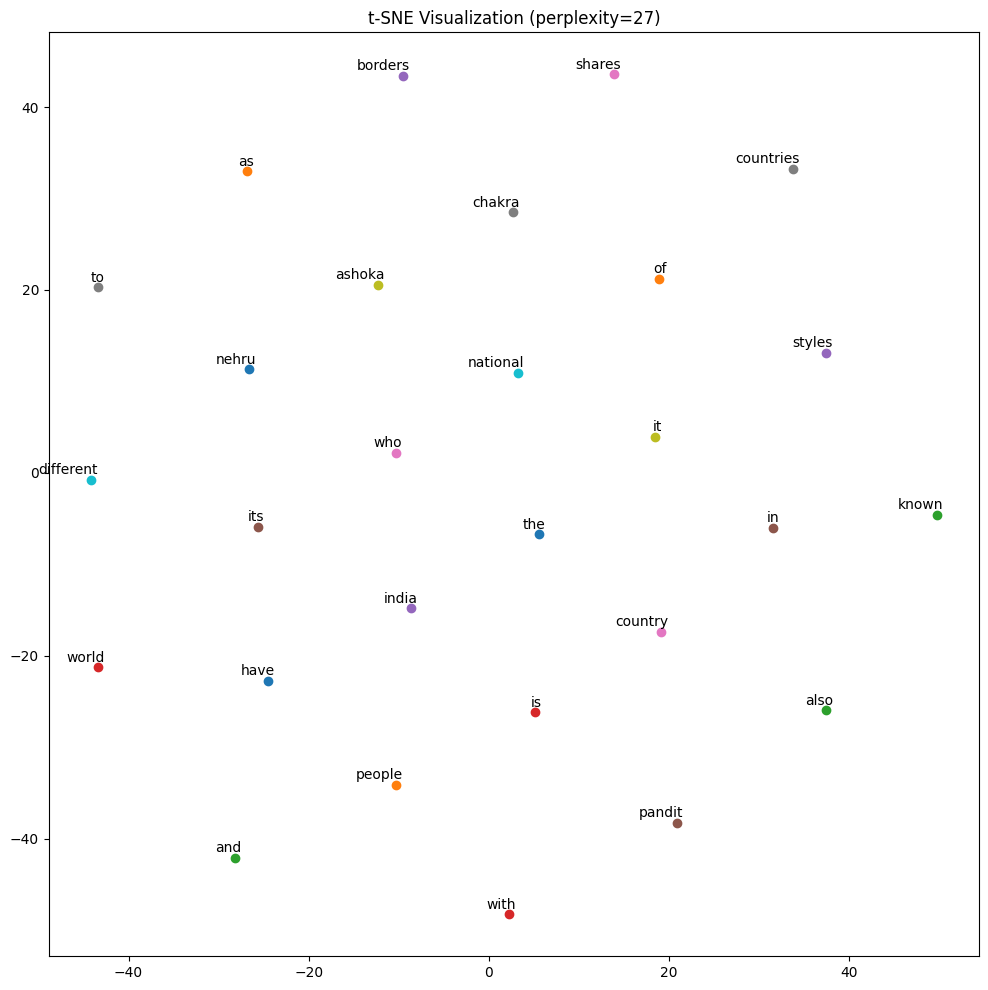

In [21]:
tsne_plot(model_w2v)


comparing performance:

tf-idf with logistic regression:
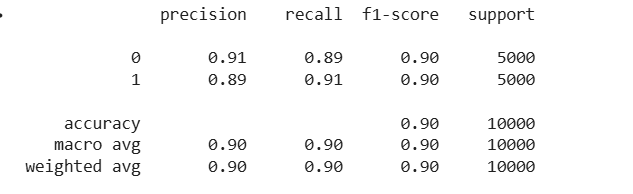

lstm:
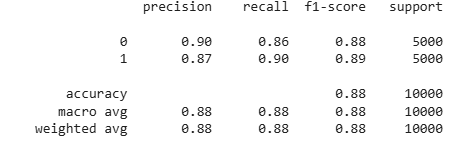